# Regresja liniowa i wielomianowa

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Zainicjalizujmy najpierw ziarno dla funkcji losującej, aby za każdym razem otrzymać *te same* ale losowe dane. Często się to przydaje gdy operujemy na losowych danych, ale w trakcie tworzenia skryptu chcemy dokładnie wiedzieć co poprawialiśmy.

In [65]:
np.random.seed(0)

Zdefinujmy funkcję, która posłuży nam wygenerowania danych, do której będziemy dopasowywali nasz model. Wylosowaliśmy również wektor X, z którym będziemy szukać zależności. 

In [66]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
print (X)

[ 0.0202184   0.07103606  0.0871293   0.11827443  0.14335329  0.38344152
  0.41466194  0.4236548   0.43758721  0.46147936  0.52184832  0.52889492
  0.54488318  0.5488135   0.56804456  0.60276338  0.63992102  0.64589411
  0.71518937  0.77815675  0.78052918  0.79172504  0.79915856  0.83261985
  0.87001215  0.891773    0.92559664  0.94466892  0.96366276  0.97861834]


Wygenerujmy teraz wartości tej funkcji dla wylosowanych X i narysujmy tą funkcję. Będziemy szukać zależnosci X ~ y

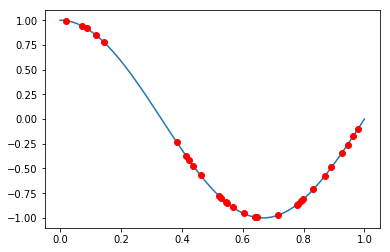

In [58]:
y = true_fun(X) 

#przedział do 'gęstego' narysowania funkcji
X_range = np.linspace(0, 1,100)

plt.plot(X_range, true_fun(X_range))
plt.plot(X, y, 'ro')
plt.show()

Dodajmy może jeszcze trochę szumu do danych aby 'utrudnić' problem dopasowania modelu w naszym przykładzie

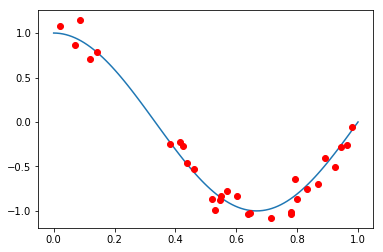

In [59]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X_range, true_fun(X_range))
plt.plot(X, y, 'ro')
plt.show()

Tutaj jest teoria 

...

i dopasujmy teraz model liniowy


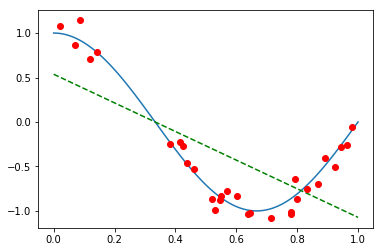

In [60]:
b1, b2 = np.polyfit(X, y, 1) #regresja wieliomanowa pierwszego stopnia (czyli liniowa)

y_lin = b2 + b1 * X_range    #model liniowy zalezosci X ~ y

plt.plot(X_range, true_fun(X_range), label='true fun')
plt.plot(X_range, y_lin, 'g--', label='linear regression')
plt.plot(X, y, 'ro', label='points to fit')
plt.show()

Oczywiście możemy dopasowaćwielomiany wyższego stopnia aniżeli pierwszego. Do tego użyjemy funkcji pomocniczej np.poly1d, która generuje funkcję wielomanu, która jest 

In [61]:
coefs_p2 = np.polyfit(X, y, 2)
coefs_p3 = np.polyfit(X, y, 3)

p2 = np.poly1d(coefs_p2)
p3 = np.poly1d(coefs_p3)


#teraz p2 jest funkcja która zwraca wartości wielomany o współczynnikach coefs_p2
print p2(0.4)

-0.49714941828


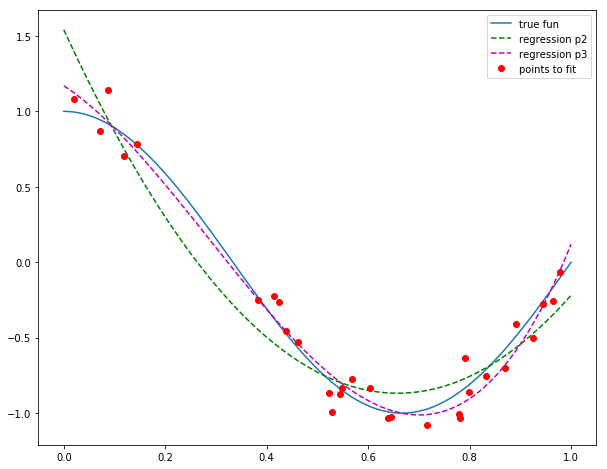

In [62]:
plt.figure(figsize=(10,8))
plt.plot(X_range, true_fun(X_range), label='true fun')
plt.plot(X_range, p2(X_range),'g--', label='regression p2')
plt.plot(X_range, p3(X_range), 'm--', label='regression p3')
plt.plot(X, y, 'ro', label='points to fit')
plt.legend()
plt.show()

Wygląda na to, że jeśli będziemy dopasowywać wieloman coraz wyższego stopnia, otrzymamy coraz lepszą aproksymację danych. Niemniej jednak zwiększanie stopnia wielomianiu, a co za tym idzie 'poziomu skomplikownia' naszego modelu, będzie powodować zbyt duże dopasowanie się do danych i zbyt małe możliwości generealizacji modelu. W szczególności możemy mówić o dwóch fenomenach jeżeli uczymy się parametrów modelu z danych:

+ *model underfit* czyli model jest zbyt 'prosty' aby uchwycić zależnośći między danymi
+ *model overfit* parametry naszego modelu 'nauczyły' się szumu

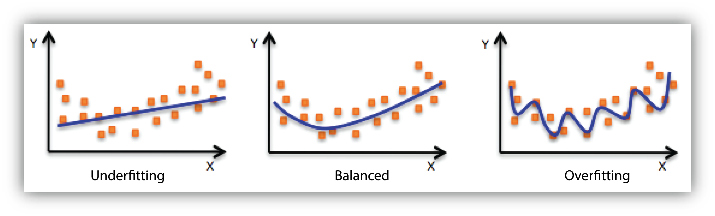

Istnieje zatem całkiem duże prawdopodobieństwo, że właśnie zwiększając stopień wielomianiu dopasowaliśmy wielomian do szumu. Aby to zilustrować weźmy wielomian 16-go stopnia:

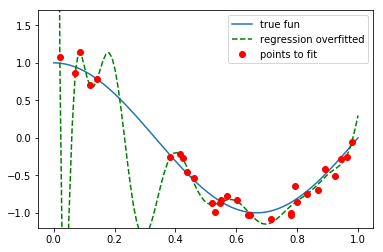

In [72]:
coefs = np.polyfit(X, y, 16)
p_overfit = np.poly1d(coefs)

plt.plot(X_range, true_fun(X_range), label='true fun')
plt.plot(X_range, p_overfit(X_range),'g--', label='regression overfitted')

plt.plot(X, y, 'ro', label='points to fit')
plt.legend()
plt.ylim((-1.2, 1.7))
plt.show()


Widzimy, że wielomian zachowuje się bardzo źle. Fenomen ten nazywa się [Efektem Rungego](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

Jak ocenić? 


In [71]:
from sklearn.metrics import r2_score

print r2_score(true_fun(X), p2(X))

0.954935278835
